In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/Salaries_aallsources 13.17.30.csv')

print(df.head())

   work_year experience_level employment_type                   job_title  \
0       2020              Mid       Full-Time              Data Scientist   
1       2020           Senior       Full-Time  Machine Learning Scientist   
2       2020           Senior       Full-Time               Data Engineer   
3       2020              Mid       Full-Time                Data Analyst   
4       2020           Senior       Full-Time   Machine Learning Engineer   

   salary salary_currency company_location company_size  
0   70000             EUR               DE            L  
1  260000             USD               JP            S  
2   85000             GBP               GB            M  
3   20000             USD               HN            S  
4  150000             USD               US            L  


In [ ]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP'], dtype=object)

In [ ]:
# Assuming the exchange rates are as follows:
exchange_rates = {'EUR': 1.07, 'GBP': 1.26}

# Function to convert salary to USD based on currency
def convert_to_usd(row):
    if row['salary_currency'] == 'USD':
        return row['salary']
    else:
        exchange_rate = exchange_rates.get(row['salary_currency'])
        if exchange_rate:
            return row['salary'] * exchange_rate
        else:
            return None

# Apply the conversion function to create a new column 'salary_usd'
df['salary_usd'] = df.apply(convert_to_usd, axis=1)

# Drop rows where conversion was not possible (currency not recognized)
df = df.dropna(subset=['salary_usd'])

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,salary_usd
0,2020,Mid,Full-Time,Data Scientist,70000,EUR,DE,L,74900.0
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,JP,S,260000.0
2,2020,Senior,Full-Time,Data Engineer,85000,GBP,GB,M,107100.0
3,2020,Mid,Full-Time,Data Analyst,20000,USD,HN,S,20000.0
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,US,L,150000.0


In [ ]:
# List of countries to keep
countries_to_keep = ['United States', 'United Kingdom', 'Germany', 'Sweden', 'Spain', 'Estonia', 'France', 'Portugal', 'Netherlands', 'Italy', 'Ireland', 'Slovenia', 'Croatia', 'Bosnia and Herzegovina', 'Latvia', 'Romania', 'Lithuania', 'Austria', 'Finland', 'Greece', 'Belgium', 'Denmark', 'Luxembourg','Canada','CA','DE', 'GB', 'FR', 'NL', 'AT', 'ES', 'PT', 'IT', 'HR', 'LU', 'PL', 'DK', 'RO', 'IE', 'BE', 'UA', 'RU', 'MT', 'SI', 'CZ', 'EE', 'LT', 'LV', 'SE', 'FI', 'CH', 'IS','US']

# Filter DataFrame to include only the countries in the list
df = df[df['company_location'].isin(countries_to_keep)]

# Optionally, you can reset the index if you want
df.reset_index(drop=True, inplace=True)

In [ ]:
df['company_location'].unique()

array(['DE', 'GB', 'US', 'FR', 'NL', 'AT', 'ES', 'PT', 'IT', 'HR', 'LU',
       'PL', 'DK', 'RO', 'BE', 'UA', 'RU', 'MT', 'SI', 'CA', 'CZ', 'EE',
       'IE', 'United States', 'United Kingdom', 'Germany', 'Sweden',
       'Spain', 'Estonia', 'France', 'Canada', 'Portugal', 'Netherlands',
       'Italy', 'Ireland', 'Slovenia', 'Croatia',
       'Bosnia and Herzegovina', 'Latvia', 'Romania', 'Lithuania',
       'Austria', 'Finland', 'Greece', 'Belgium', 'Denmark', 'Luxembourg'],
      dtype=object)

In [ ]:
country_mapping = {
    'Belgium': 'BE', 'Greece': 'EL', 'Lithuania': 'LT', 'Portugal': 'PT',
    'Bulgaria': 'BG', 'Spain': 'ES', 'Luxembourg': 'LU', 'Romania': 'RO',
    'Czechia': 'CZ', 'France': 'FR', 'Hungary': 'HU', 'Slovenia': 'SI',
    'Denmark': 'DK', 'Croatia': 'HR', 'Malta': 'MT', 'Slovakia': 'SK',
    'Germany': 'DE', 'Italy': 'IT', 'Netherlands': 'NL', 'Finland': 'FI',
    'Estonia': 'EE', 'Cyprus': 'CY', 'Austria': 'AT', 'Sweden': 'SE',
    'Ireland': 'IE', 'Latvia': 'LV', 'Poland': 'PL',
    'Iceland': 'IS', 'Norway': 'NO',
    'Liechtenstein': 'LI', 'Switzerland': 'CH',
    'Bosnia and Herzegovina': 'BA',
    'Montenegro': 'ME',
    'Moldova': 'MD',
    'North Macedonia': 'MK',
    'Georgia': 'GE',
    'Albania': 'AL',
    'Serbia': 'RS',
    'Ukraine': 'UA',
    'Canada': 'CA',
    'United States': 'US', 'United Kingdom': 'GB'
}

# Change country names using country_mapping
df['company_location'] = df['company_location'].replace(country_mapping)

In [ ]:
df['company_location'].unique()

array(['DE', 'GB', 'US', 'FR', 'NL', 'AT', 'ES', 'PT', 'IT', 'HR', 'LU',
       'PL', 'DK', 'RO', 'BE', 'UA', 'RU', 'MT', 'SI', 'CA', 'CZ', 'EE',
       'IE', 'SE', 'BA', 'LV', 'LT', 'FI', 'EL'], dtype=object)

In [ ]:
df.to_csv('/content/Salaries_aallsources 13.17.30.csv', index=False)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,salary_usd
0,2020,Mid,Full-Time,Data Scientist,70000,EUR,DE,L,74900.0
1,2020,Senior,Full-Time,Data Engineer,85000,GBP,GB,M,107100.0
2,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,US,L,150000.0
3,2020,Entry,Full-Time,Data Analyst,72000,USD,US,L,72000.0
4,2020,Senior,Full-Time,Data Scientist,190000,USD,US,S,190000.0


In [ ]:
df['experience_level'].unique()

array(['Mid', 'Senior', 'Entry', 'Executive'], dtype=object)

In [ ]:
# Dictionary mapping experience levels to experience years range
experience_mapping = {
    'Senior': '5-10',
    'Mid': '2-5',
    'Entry': '0-2',
    'Executive': '10 and more'
}

# Create a new column 'experience_years' based on the mapping
df['experience_years'] = df['experience_level'].map(experience_mapping)

# Display the DataFrame
print(df)


      work_year experience_level employment_type                  job_title  \
0          2020              Mid       Full-Time             Data Scientist   
1          2020           Senior       Full-Time              Data Engineer   
2          2020           Senior       Full-Time  Machine Learning Engineer   
3          2020            Entry       Full-Time               Data Analyst   
4          2020           Senior       Full-Time             Data Scientist   
...         ...              ...             ...                        ...   
3558       2021           Senior       Full-Time               Data Analyst   
3559       2020           Senior       Full-Time             Data Scientist   
3560       2021              Mid       Full-Time             Data Scientist   
3561       2020            Entry       Full-Time             Data Scientist   
3562       2020            Entry        Contract      Business Data Analyst   

      salary salary_currency company_location compa

In [ ]:
# Dictionary mapping experience years range to numerical values
experience_years_mapping = {
    '0-2': 1.5,
    '2-5': 3.5,
    '5-10': 7.5,
    '10 and more': 10
}

# Create a new column 'experience_years_numeric' with numerical values
df['experience_years_numeric'] = df['experience_years'].map(experience_years_mapping)



In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,salary_usd,experience_years,experience_years_numeric
0,2020,Mid,Full-Time,Data Scientist,70000,EUR,DE,L,74900.0,2-5,3.5
1,2020,Senior,Full-Time,Data Engineer,85000,GBP,GB,M,107100.0,5-10,7.5
2,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,US,L,150000.0,5-10,7.5
3,2020,Entry,Full-Time,Data Analyst,72000,USD,US,L,72000.0,0-2,1.5
4,2020,Senior,Full-Time,Data Scientist,190000,USD,US,S,190000.0,5-10,7.5


In [ ]:
df.to_csv('/content/Salaries_aallsources 13.17.30.csv', index=False)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sal_data = pd.read_csv('/content/Salaries_aallsources 13.17.30.csv')

In [26]:
sal_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,salary_usd,experience_years,experience_years_numeric
0,2020,Mid,Full-Time,Data Scientist,70000,EUR,DE,L,74900.0,2-5,3.5
1,2020,Senior,Full-Time,Data Engineer,85000,GBP,GB,M,107100.0,5-10,7.5
2,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,US,L,150000.0,5-10,7.5
3,2020,Entry,Full-Time,Data Analyst,72000,USD,US,L,72000.0,0-2,1.5
4,2020,Senior,Full-Time,Data Scientist,190000,USD,US,S,190000.0,5-10,7.5


In [27]:
sal_data.shape

(3563, 11)

In [29]:
sal_data.dtypes

work_year                     int64
experience_level             object
employment_type              object
job_title                    object
salary                        int64
salary_currency              object
company_location             object
company_size                 object
salary_usd                  float64
experience_years             object
experience_years_numeric    float64
dtype: object

In [30]:
sal_data.info

<bound method DataFrame.info of       work_year experience_level employment_type                  job_title  \
0          2020              Mid       Full-Time             Data Scientist   
1          2020           Senior       Full-Time              Data Engineer   
2          2020           Senior       Full-Time  Machine Learning Engineer   
3          2020            Entry       Full-Time               Data Analyst   
4          2020           Senior       Full-Time             Data Scientist   
...         ...              ...             ...                        ...   
3558       2021           Senior       Full-Time               Data Analyst   
3559       2020           Senior       Full-Time             Data Scientist   
3560       2021              Mid       Full-Time             Data Scientist   
3561       2020            Entry       Full-Time             Data Scientist   
3562       2020            Entry        Contract      Business Data Analyst   

      salary salary

In [31]:
sal_data.describe()

,work_year,salary,salary_usd,experience_years_numeric
count,3563.000000,3563.000000,3563.000000,3563.000000
mean,2022.382543,142608.980073,144127.414471,6.146506
std,0.780085,68784.547974,67856.838077,2.306311
min,2020.000000,8760.000000,9373.200000,1.500000
25%,2022.000000,90320.000000,94500.000000,3.500000
50%,2023.000000,136620.000000,138000.000000,7.500000
75%,2023.000000,185000.000000,185000.000000,7.500000
max,2023.000000,600000.000000,600000.000000,10.000000


In [32]:
corr = sal_data[['salary_usd','experience_years_numeric']]
corr

,salary_usd,experience_years_numeric
0,74900.0,3.5
1,107100.0,7.5
2,150000.0,7.5
3,72000.0,1.5
4,190000.0,7.5
...,...,...
3558,165000.0,7.5
3559,412000.0,7.5
3560,151000.0,3.5
3561,105000.0,1.5


<Axes: >

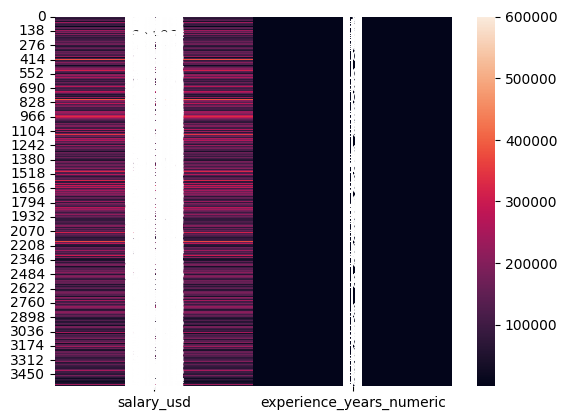

In [33]:
sns.heatmap(corr, annot=True)

In [34]:
sal_data['job_title'].value_counts()

Data Engineer                         980
Data Scientist                        857
Data Analyst                          627
Machine Learning Engineer             424
Research Scientist                    110
Data Architect                         95
Research Engineer                      56
Applied Scientist                      48
Machine Learning Scientist             44
Business Intelligence Engineer         43
Head of Data                           32
Data Manager                           31
Business Data Analyst                  28
Business Intelligence Analyst          20
AI Scientist                           16
Applied Machine Learning Scientist     14
Machine Learning Software Engineer     11
Data Science Lead                      10
Data Operations Engineer                8
Deep Learning Engineer                  8
ETL Developer                           7
Decision Scientist                      7
MLOps Engineer                          6
AI Programmer                     

In [48]:
df['company_size'].unique()

array(['L', 'M', 'S', 'Medium', 'Large', 'Small'], dtype=object)

In [49]:
company_size_mapping = {
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small',
    'Large': 'Large',
    'Medium': 'Medium',
    'Small': 'Small'
}

# Apply the mapping to create a new column 'company_size_full'
df['company_size_full'] = df['company_size'].map(company_size_mapping)


In [35]:
sal_data['employment_type'].value_counts()

Full-Time    3523
Contract       17
Part-Time      16
Freelance       7
Name: employment_type, dtype: int64

<Axes: ylabel='Frequency'>

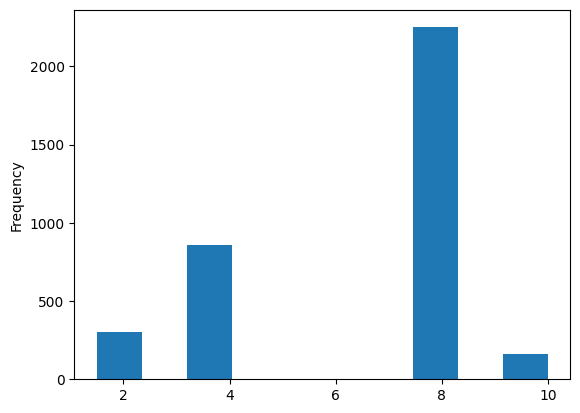

In [36]:
sal_data['experience_years_numeric'].plot(kind='hist')

<Axes: ylabel='Frequency'>

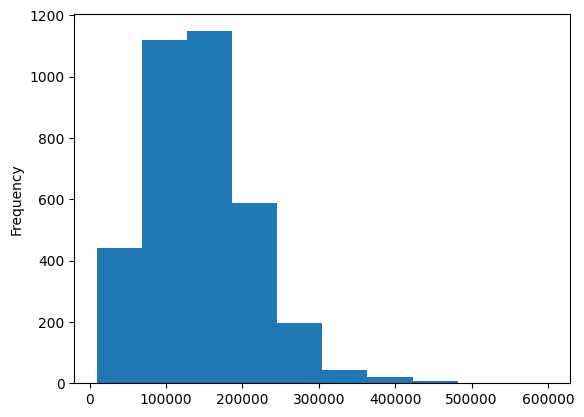

In [37]:
sal_data['salary_usd'].plot(kind='hist')

In [41]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [43]:
sal_data['job_title_Encode'] = Label_Encoder.fit_transform(sal_data['job_title'])

In [44]:
sal_data['employment_type_Encode'] = Label_Encoder.fit_transform(sal_data['employment_type'])

In [54]:
sal_data['company_size_Encode'] = Label_Encoder.fit_transform(sal_data['company_size'])

In [55]:
sal_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,salary_usd,experience_years,experience_years_numeric,job_title_Encode,employment_type_Encode,company_size_Encode
0,2020,Mid,Full-Time,Data Scientist,70000,EUR,DE,0,74900.0,2-5,3.5,28,2,0
1,2020,Senior,Full-Time,Data Engineer,85000,GBP,GB,2,107100.0,5-10,7.5,14,2,2
2,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,US,0,150000.0,5-10,7.5,38,2,0
3,2020,Entry,Full-Time,Data Analyst,72000,USD,US,0,72000.0,0-2,1.5,12,2,0
4,2020,Senior,Full-Time,Data Scientist,190000,USD,US,4,190000.0,5-10,7.5,28,2,4


In [57]:
X = sal_data[['experience_years_numeric', 'job_title_Encode', 'employment_type_Encode', 'company_size_Encode']]
y = sal_data['salary_usd']

In [58]:
X.head()

,experience_years_numeric,job_title_Encode,employment_type_Encode,company_size_Encode
0,3.5,28,2,0
1,7.5,14,2,2
2,7.5,38,2,0
3,1.5,12,2,0
4,7.5,28,2,4


In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=42)
x_train.head()

,experience_years_numeric,job_title_Encode,employment_type_Encode,company_size_Encode
1200,7.5,24,2,3
2641,7.5,14,2,3
2034,3.5,14,2,3
3004,1.5,28,2,3
1157,7.5,28,2,3


In [69]:
x_train.shape


(2850, 4)

In [70]:
y_train.shape

(2850,)

In [64]:
x_test.shape

(713, 4)

In [71]:
y_test.shape

(713,)

In [65]:
from sklearn.linear_model import LinearRegression
Linear_regression_model = LinearRegression()

In [67]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

MODEL PREDICTION:

In [72]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr

array([180929.05729167, 123196.8005076 ,  93242.46974693, 107715.15721201,
        98808.88800273, 101035.45530505, 181525.27485892, 173732.2893008 ,
       178289.75172608, 133320.68118868, 149344.37679593,  72358.30807454,
       104305.7543781 , 167156.91521448, 178289.75172608,  96651.87258084,
       149344.37679593, 151570.94409825, 116621.42642128, 149344.37679593,
       149344.37679593, 149344.37679593, 165412.63805586,  73471.5917257 ,
       149344.37679593, 178289.75172608, 149344.37679593, 151536.16815803,
        73541.14360613, 178289.75172608, 149344.37679593, 153762.73546035,
       155919.75088224, 101035.45530505,  98808.88800273, 167156.91521448,
       149344.37679593, 182742.88633072,  93545.47338679, 183155.62459399,
       112237.84369707, 164930.34791216, 178289.75172608,  98808.88800273,
       188309.30458652, 178289.75172608, 151570.94409825, 183155.62459399,
       167156.91521448, 141551.39123781, 182673.33445029,  91353.68202468,
       105419.03802926, 1

In [75]:
df = pd.DataFrame({'y_Actual':y_test, 'y_Predicted':y_pred_lr} )
df['Error']=df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])

df

,y_Actual,y_Predicted,Error,abs_error
2272,140000.0,180929.057292,-40929.057292,40929.057292
184,115000.0,123196.800508,-8196.800508,8196.800508
2725,107000.0,93242.469747,13757.530253,13757.530253
1361,130000.0,107715.157212,22284.842788,22284.842788
2856,52500.0,98808.888003,-46308.888003,46308.888003
...,...,...,...,...
654,115934.0,149344.376796,-33410.376796,33410.376796
471,100000.0,153762.735460,-53762.735460,53762.735460
3203,147800.0,150457.660447,-2657.660447,2657.660447
1034,148594.0,178289.751726,-29695.751726,29695.751726


In [76]:

Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

44045.02484431925

In [77]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
r2_score(y_test, y_pred_lr)

0.22317250991582582

The accuracy is only 20%, we will forget abt this and work on different model.

In [80]:
sal_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size,salary_usd,experience_years,experience_years_numeric,job_title_Encode,employment_type_Encode,company_size_Encode
0,2020,Mid,Full-Time,Data Scientist,70000,EUR,DE,0,74900.0,2-5,3.5,28,2,0
1,2020,Senior,Full-Time,Data Engineer,85000,GBP,GB,2,107100.0,5-10,7.5,14,2,2
2,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,US,0,150000.0,5-10,7.5,38,2,0
3,2020,Entry,Full-Time,Data Analyst,72000,USD,US,0,72000.0,0-2,1.5,12,2,0
4,2020,Senior,Full-Time,Data Scientist,190000,USD,US,4,190000.0,5-10,7.5,28,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,2021,Senior,Full-Time,Data Analyst,165000,USD,US,1,165000.0,5-10,7.5,12,2,1
3559,2020,Senior,Full-Time,Data Scientist,412000,USD,US,1,412000.0,5-10,7.5,28,2,1
3560,2021,Mid,Full-Time,Data Scientist,151000,USD,US,1,151000.0,2-5,3.5,28,2,1
3561,2020,Entry,Full-Time,Data Scientist,105000,USD,US,5,105000.0,0-2,1.5,28,2,5


In [81]:
data = sal_data[['salary_usd', 'experience_years_numeric']].copy()

In [82]:
data

,salary_usd,experience_years_numeric
0,74900.0,3.5
1,107100.0,7.5
2,150000.0,7.5
3,72000.0,1.5
4,190000.0,7.5
...,...,...
3558,165000.0,7.5
3559,412000.0,7.5
3560,151000.0,3.5
3561,105000.0,1.5


In [83]:
data = data.rename(columns={'salary_usd': 'Salary', 'experience_years_numeric': 'YearsExperience'})

print(data)

        Salary  YearsExperience
0      74900.0              3.5
1     107100.0              7.5
2     150000.0              7.5
3      72000.0              1.5
4     190000.0              7.5
...        ...              ...
3558  165000.0              7.5
3559  412000.0              7.5
3560  151000.0              3.5
3561  105000.0              1.5
3562  100000.0              1.5

[3563 rows x 2 columns]


In [93]:
#Reshape
x = data.YearsExperience.values.reshape(-1,1)
y = data.Salary.values.reshape(-1,1)

In [94]:
xtrain,ytrain,xtest,ytest = train_test_split(x,y,test_size= 0.3)

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [96]:
model.fit(x,y)

LinearRegression()

PREDICTION


In [100]:
# Reshape the input array to 2D
next_salary = model.predict([[2]])
print(int(next_salary))


92048


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming x and y are your feature and target variables
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

# Create and fit the model
model = LinearRegression()
model.fit(xtrain, ytrain)

# Check model accuracy on training data
train_accuracy = model.score(xtrain, ytrain)
print("Training Accuracy:", train_accuracy)

# Check model accuracy on test data
test_accuracy = model.score(xtest, ytest)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.1827855130617726
Test Accuracy: 0.1794403894341099
